In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

This kernel follows the instruction of [Pedro Marcelino](https://www.kaggle.com/pmarcelino/house-prices-advanced-regression-techniques/comprehensive-data-exploration-with-python)

In [2]:
df_train = pd.read_csv('input/train.csv')

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Looking at "SalePrice"

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

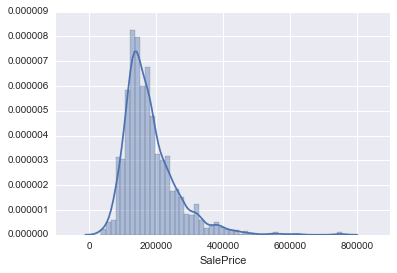

In [6]:
sns.distplot(df_train['SalePrice'])

**Note**:
- Data distribution is approximately normal
- The skewness is possitive

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Looking at the relationship between "SalePrice" and other variables

Plot the data point to see the linear interaction between dependent variable and single independent variable

In [8]:
all_columns = df_train.columns.values
non_categorical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
                   "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
                   "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
                   "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                   "ScreenPorch","PoolArea", "MiscVal"]

categorical = [value for value in all_columns if value not in non_categorical and value != "Id"]

## Relationship with numerical variables

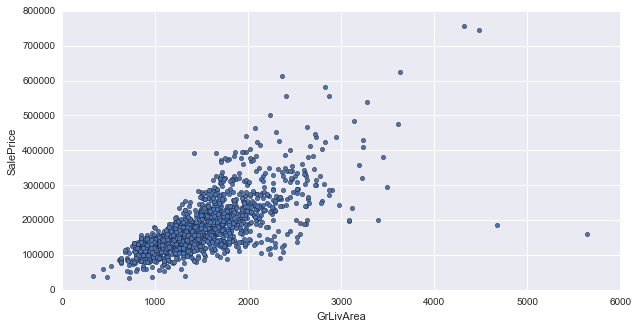

In [9]:
#scatter plot grlivarea/saleprice:
#GrLivArea: Above grade (ground) living area square feet
var_1 = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var_1]], axis=1)
data.plot.scatter(x=var_1, y='SalePrice', ylim=(0,800000), figsize=[10, 5]);

**SalePrice** and **GrLivArea** are linearly related

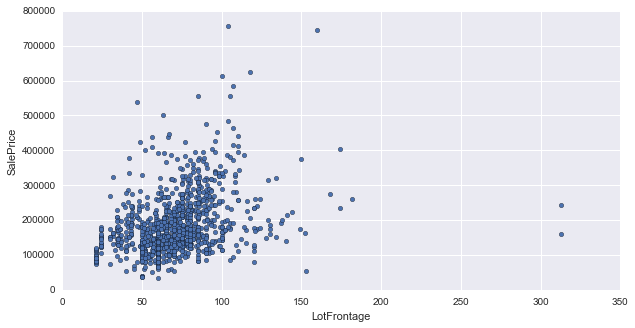

In [10]:
var_2 = 'LotFrontage'
data = pd.concat([df_train['SalePrice'], df_train[var_2]], axis=1)
data.plot.scatter(x=var_2, y='SalePrice', ylim=(0,800000), figsize=[10, 5]);

The linear relationship is not clear between **SalePrice** and **LotFrontage**

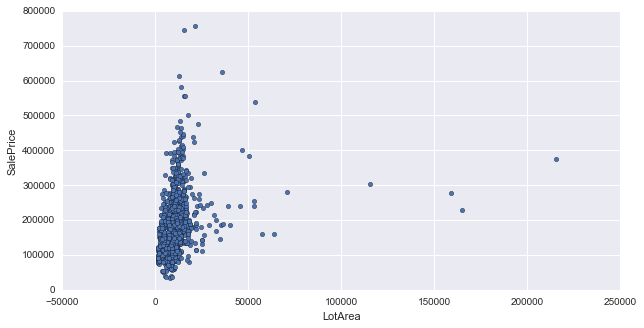

In [11]:
var_3 = 'LotArea'
data = pd.concat([df_train['SalePrice'], df_train[var_3]], axis=1)
data.plot.scatter(x=var_3, y='SalePrice', ylim=(0,800000), figsize=[10, 5]);

## Relationship with categorical variables

In [12]:
#categorical

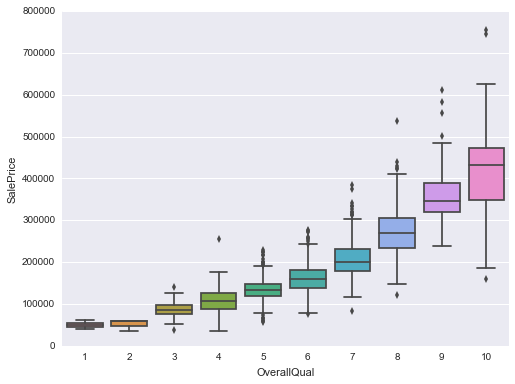

In [13]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

**OverallQual** seems to be related strongly with **SalePrice**

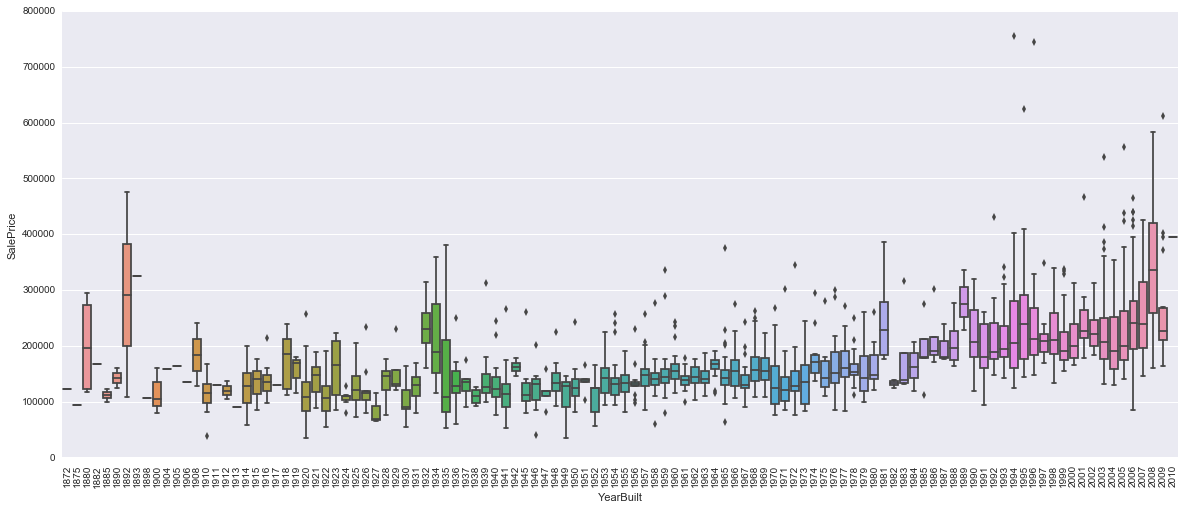

In [14]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

The relationship between **SalePrice** and **YearBuilt** is not clear

**In summary**:
- From the scatter between SalePrice and another variable, we can identify the linear relationship which is helpful for Feature Selection 
- The problem is there are many features needed to be analysed

# Looking at the correlation between independent variables

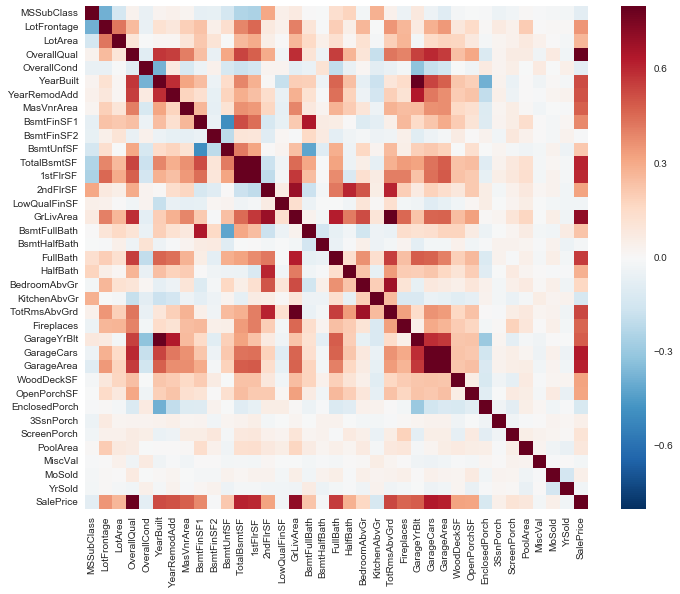

In [15]:
#correlation matrix
corrmat = df_train.drop('Id', 1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**Note**:
- The dark color indicates higher [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) between two variables.
- As can be seen from the heatmap, there is a situation of [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity).
- There are two noticeable dark-colored squares: GarageYrBlt - YearBuilt, TotRmsAbvGrd - GrLivArea.
- One more trick here is we can observe the relation between SalePrice and the other variables in heatmap as well. This step can help us to decide the number of variables for "zoom-in" heatmap.

Below is the "zoom-in" heatmap for some variables that are most correlated with 'SalePrice'. Note that, this step can be done earlier.

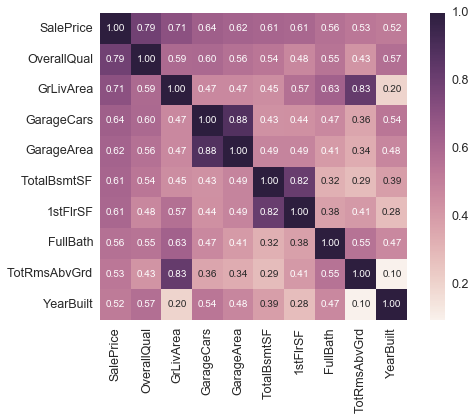

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

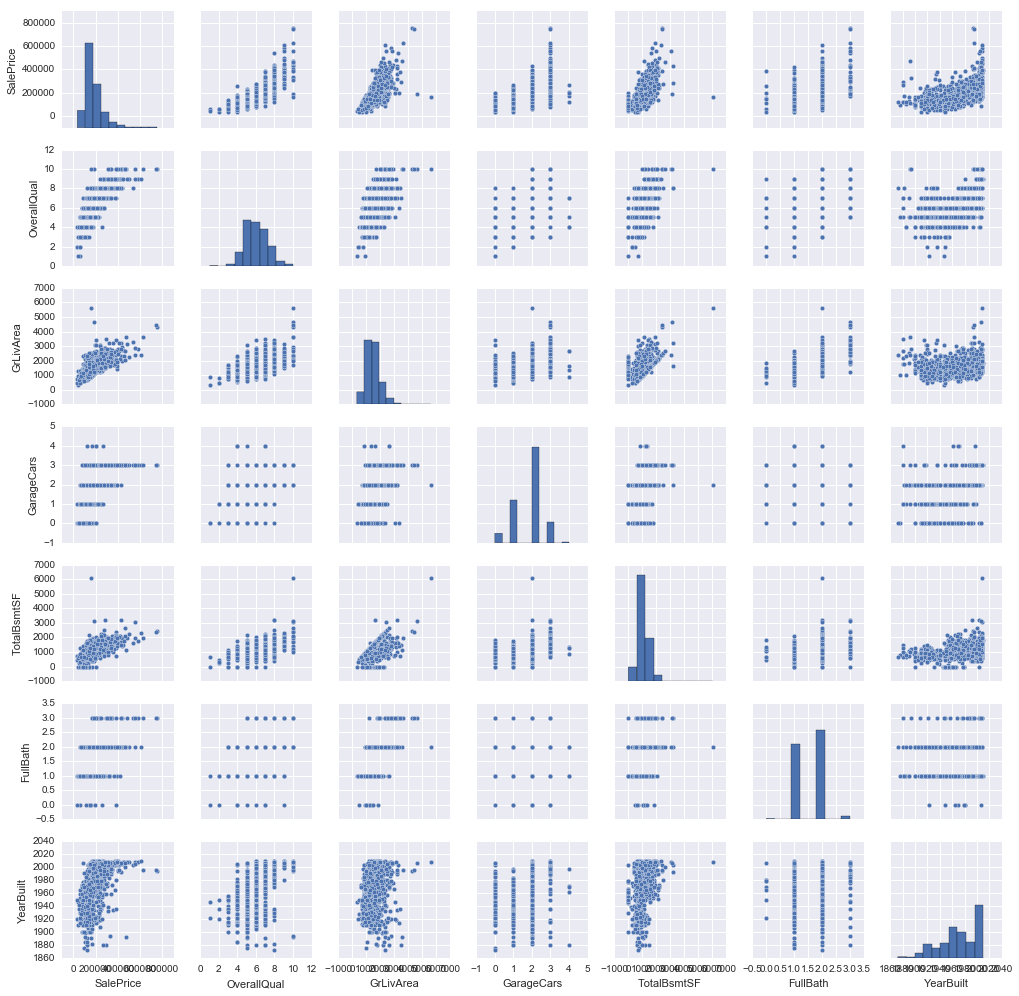

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2)
plt.show();

# Handling missing data

When considering the missing data, we should think about:
- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

In [18]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


**Note**:
- There are 6 variables (PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage) which more than 15% of data is missing and these variables are not correlated with the SalePrice. Therefore, we can delete these unimportant variables from the model without hesitation.
- Some variables have the same number of missing values: group of "Garage", "Bsmt" and "MasVnr" variables. Let's look into each group:
    + "Garage": these variables may be expressed by variables 'GarageCars' which is one of the most correlated with SalePrice
    + "Bsmt": same logic as above (TotalBsmtSF)
    + "MasVnr": Pedro suggested to delete this variables from the model. I'm not sure whether this variable can give some information

In [19]:
#df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop((missing_data[missing_data['Total'] > 8]).index,1)

df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

8

# Treating outliers

The differences between univariate and bivariate analysis can be found [here](http://www.math.kent.edu/~reed/Instructors/MATH%2010041/Ch4/Univariate%20vs%20bivariate%20data.pdf)

## Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [20]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


- Low range values are similar and not too far from 0.
- High range values are far from 0 and the 7.something values are really out of range.

## Bivariate analysis

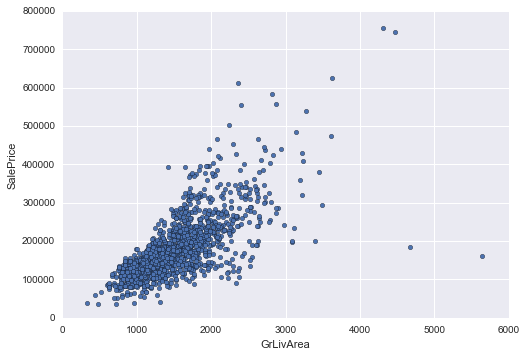

In [21]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

There seems to be some outliers in this data. These outliers are detected by residual. The removal of 3 outliers with the largest residuals are performed as follow:

In [22]:
from outlier_cleaner import outlierCleaner

In [23]:
from sklearn.linear_model import LinearRegression
x = df_train['GrLivArea'].reshape(len(df_train['GrLivArea']), 1)
y = df_train['SalePrice'].reshape(len(df_train['SalePrice']), 1)
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
predictions = reg.predict(x)

In [25]:
cleaned_data = outlierCleaner(predictions, df_train['GrLivArea'], df_train['SalePrice'])

In [26]:
#cleaned_data

In [27]:
GrLivArea, SalePrice, errors = zip(*cleaned_data)

In [28]:
GrLivArea = np.reshape(np.array(GrLivArea), (len(GrLivArea), 1))
SalePrice = np.reshape(np.array(SalePrice), (len(SalePrice), 1))

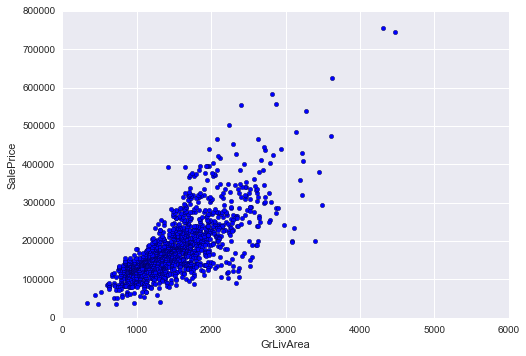

In [29]:
plt.scatter(GrLivArea, SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.xlim(0, 6000)
plt.ylim((0,800000))
plt.show()

In [30]:
len(cleaned_data)

1456

# Checking assumptions

There are 5 [assumptions](http://www.statisticssolutions.com/assumptions-of-linear-regression/) should be tested:

- Linear relationship: linear regression needs the relationship between the independent and dependent variables to be linear.  It is also important to check for outliers since linear regression is **sensitive** to outlier effects. --> We've done this step.

- Multivariate normality: the linear regression analysis requires all variables to be multivariate normal.  This assumption can best be checked with a histogram and a fitted normal curve or a Q-Q-Plot.  Normality can be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnof test.

- No or little multicollinearity: If multicollinearity is found in the data centering the data, that is deducting the mean score might help to solve the problem.  Other alternatives to tackle the problems is conducting a factor analysis and rotating the factors to insure independence of the factors in the linear regression analysis. --> We've gone through this step.

- No auto-correlation: Autocorrelation occurs when the residuals are not independent from each other.  In other words when the value of y(x+1) is not independent from the value of y(x).

- Homoscedasticity: Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables. The scatter plot is good way to check whether homoscedasticity (that is the error terms along the regression are equal) is given

## Multivariate normality

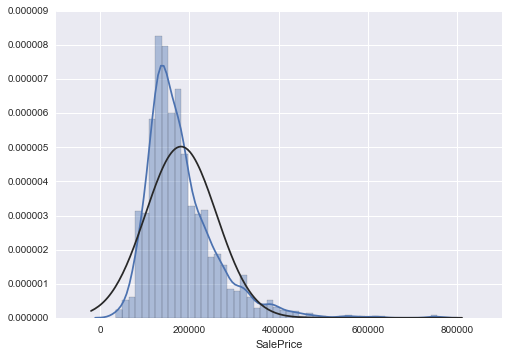

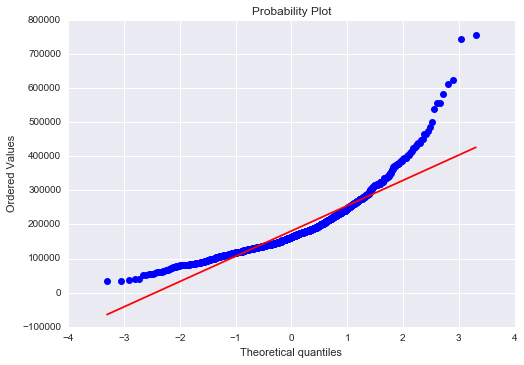

In [31]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

As we can see, the distribution of SalePrice is normal. However, we can improve this distribution by transform SalePrice to log.

In [32]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

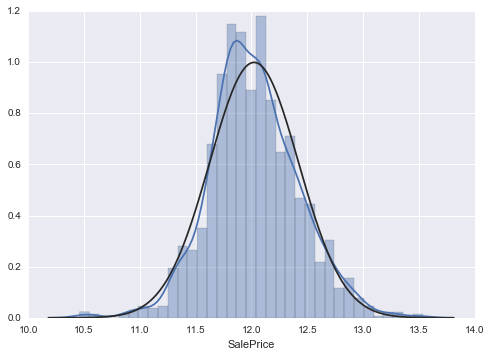

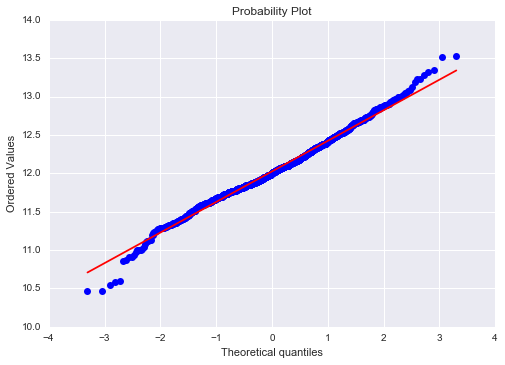

In [33]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

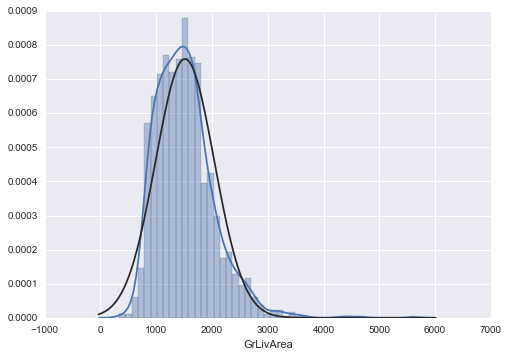

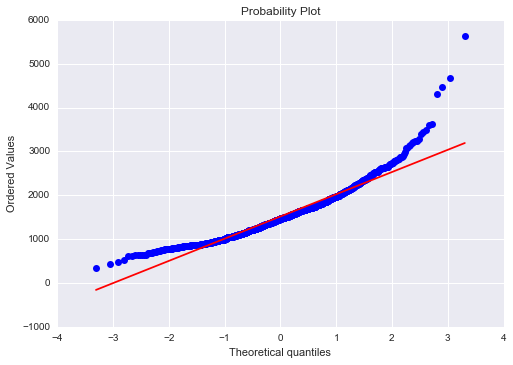

In [34]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [35]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

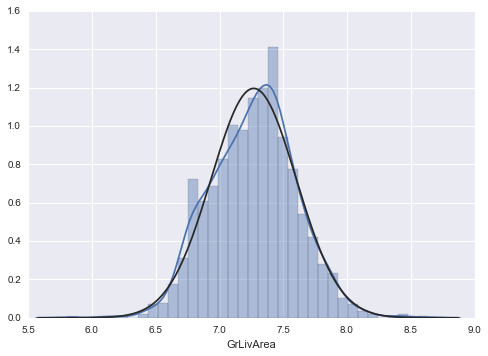

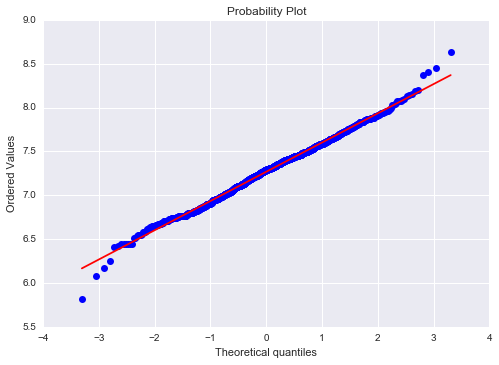

In [36]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

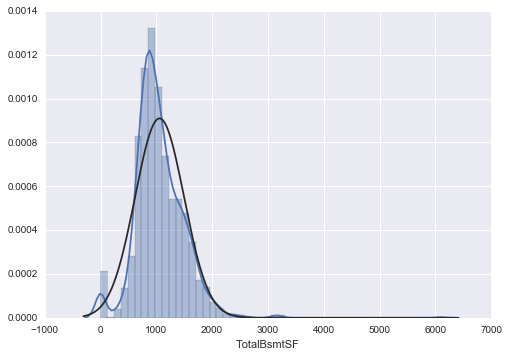

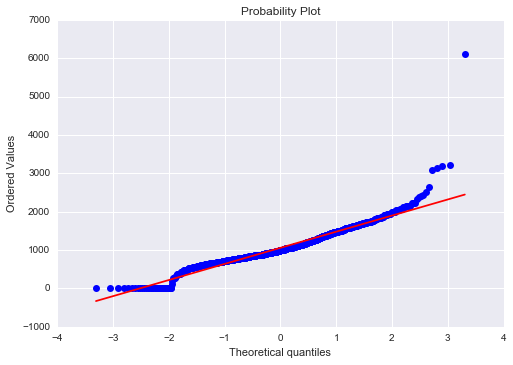

In [37]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [38]:
def TotalBsmtSF_transform(x):
    if x == 0:
        return 0.001
    else:
        return x

In [39]:
df_train['TotalBsmtSF'] = df_train['TotalBsmtSF'].apply(TotalBsmtSF_transform)

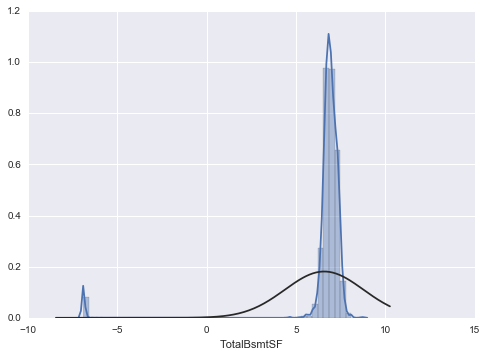

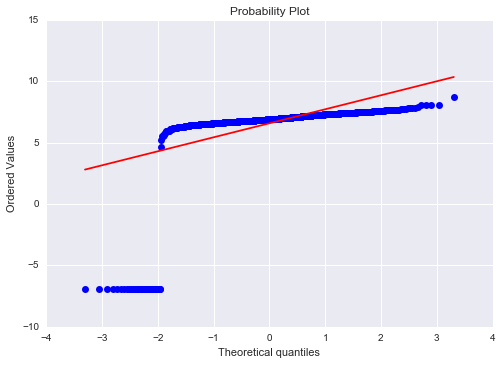

In [40]:
#data transformation
df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [41]:
"""
#data transformation
df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)
"""
#This returns a bug 

"\n#data transformation\ndf_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])\n\n#histogram and normal probability plot\nsns.distplot(df_train['TotalBsmtSF'], fit=norm);\nfig = plt.figure()\nres = stats.probplot(df_train['TotalBsmtSF'], plot=plt)\n"

A big problem because the value zero doesn't allow us to do log transformations

In [43]:
df_train['TotalBsmtSF'].describe()

count    1459.000000
mean        6.574902
std         2.204506
min        -6.907755
25%         6.679599
50%         6.899723
75%         7.168965
max         8.717682
Name: TotalBsmtSF, dtype: float64

## Homoscedasticity

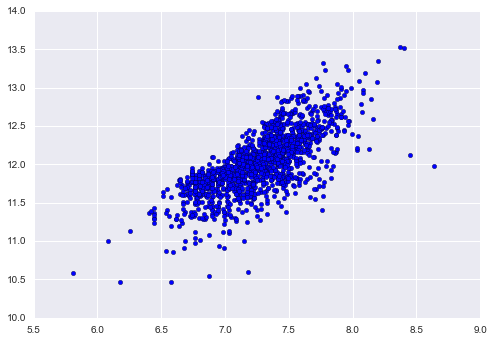

In [47]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);